#📌 Extracción

In [1]:
import pandas as pd
import json

# Leer el archivo JSON directamente
with open('TelecomX_Data.json', 'r') as file:
    data = json.load(file)

# Convertir a DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [2]:
# Ver columnas y tipos de datos
print(df.info())

# Ver primeras filas para explorar
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Primero, ver columnas
print(df.columns)


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [4]:
import pandas as pd

# Expandir columnas anidadas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Unir todo en un solo DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Verificar resultado
print(df_final.shape)
df_final.head()


(7267, 21)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Conteo de valores nulos por columna
missing_values = df_final.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Valores ausentes por columna:\n", missing_values)


Valores ausentes por columna:
 Series([], dtype: int64)


In [6]:
duplicates = df_final.duplicated().sum()
print(f"Filas duplicadas: {duplicates}")


Filas duplicadas: 0


In [7]:
# Ver tipos de datos
print(df_final.dtypes)


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [9]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')


In [11]:
print("Valores perdidos en Charges.Total:", df_final['Charges.Total'].isnull().sum())
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(df_final['Charges.Total'].mean())


Valores perdidos en Charges.Total: 11


In [12]:
df_final.head(10)  # Muestra las primeras 10 filas


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


Revisar inconsistencias

In [13]:
missing_total = df_final['Charges.Total'].isnull().sum()
print(f"Valores faltantes en Charges.Total: {missing_total}")


Valores faltantes en Charges.Total: 0


In [14]:
print(df_final.info())        # Verifica tipos y nulos
print(df_final.duplicated().sum())  # Verifica duplicados otra vez
df_final.head()               # Muestra la tabla limpia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [15]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


In [18]:
df_final[['Charges.Monthly', 'Cuentas_Diarias']].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [17]:
df_final['Cuentas_Diarias'] = df_final['Cuentas_Diarias'].round(2)


#📊 Carga y análisis

##Analisis descriptivo

In [19]:
df_final.describe()


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157292
std,0.369074,24.571773,30.129572,2266.915104,1.004407
min,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.425000,401.400000,1.180000
50%,0.000000,29.000000,70.300000,1394.550000,2.340000
75%,0.000000,55.000000,89.875000,3778.525000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


Analisis columnas importantes

In [20]:
df_final[['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'tenure']].describe()


,Charges.Monthly,Charges.Total,Cuentas_Diarias,tenure
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,64.720098,2280.634213,2.157292,32.346498
std,30.129572,2266.915104,1.004407,24.571773
min,18.250000,18.800000,0.610000,0.000000
25%,35.425000,401.400000,1.180000,9.000000
50%,70.300000,1394.550000,2.340000,29.000000
75%,89.875000,3778.525000,2.995000,55.000000
max,118.750000,8684.800000,3.960000,72.000000


Distribucion de churn

In [21]:
df_final['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
No,71.198569
Yes,25.719004
,3.082427


Medidas especificas por grupo

In [22]:
df_final.groupby('Churn')[['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'tenure']].agg(['mean', 'median', 'std'])


Charges.Monthly                    Charges.Total                         \
                 mean  median        std          mean    median          std   
Churn                                                                           
            63.412277  69.100  31.388712   2196.933705  1163.175  2329.961954   
No          61.265124  64.425  31.092648   2554.760104  1689.175  2327.013364   
Yes         74.441332  79.650  24.666053   1531.796094   703.550  1890.822994   

      Cuentas_Diarias                      tenure                    
                 mean median       std       mean median        std  
Churn                                                                
             2.113795  2.305  1.046431  31.571429   29.0  24.998552  
No           2.042080  2.150  1.036492  37.569965   38.0  24.113777  
Yes          2.481450  2.660  0.822287  17.979133   10.0  19.531123

Histograma de charges total

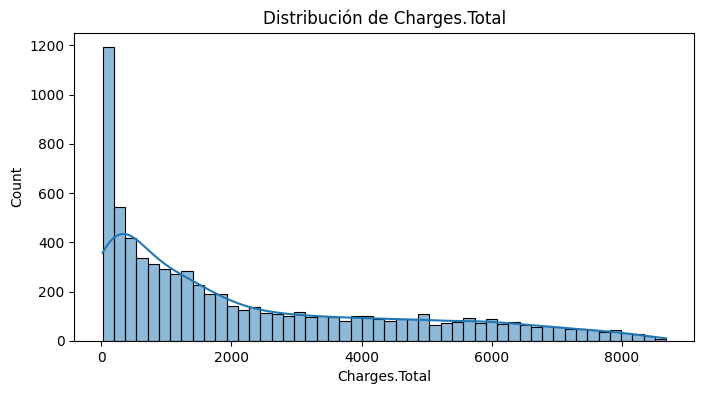

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df_final['Charges.Total'], bins=50, kde=True)
plt.title('Distribución de Charges.Total')
plt.xlabel('Charges.Total')
plt.show()


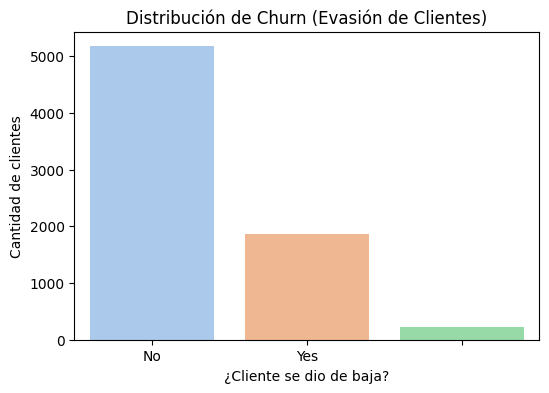

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df_final, x='Churn', hue='Churn', palette='pastel', legend=False)
plt.title('Distribución de Churn (Evasión de Clientes)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()


Recuento de evasión por variables categóricas

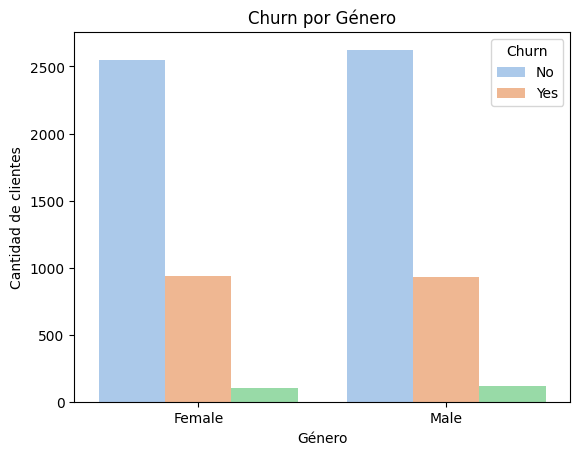

In [26]:
sns.countplot(data=df_final, x='gender', hue='Churn', palette='pastel')
plt.title('Churn por Género')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Género')
plt.show()


2. Churn vs. Tipo de Contrato (Contract)

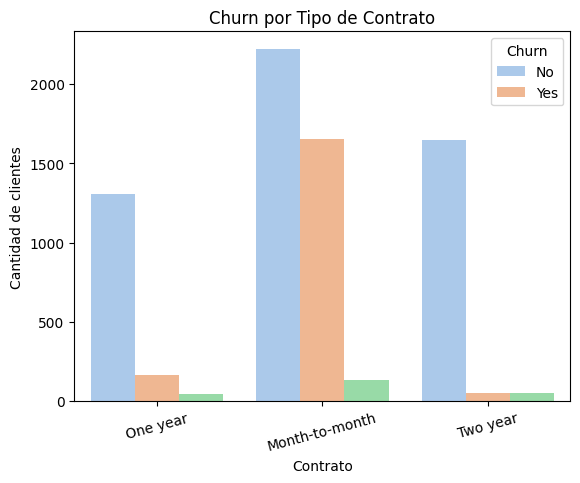

In [27]:
sns.countplot(data=df_final, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn por Tipo de Contrato')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Contrato')
plt.xticks(rotation=15)
plt.show()


Churn vs. Método de Pago (PaymentMethod)

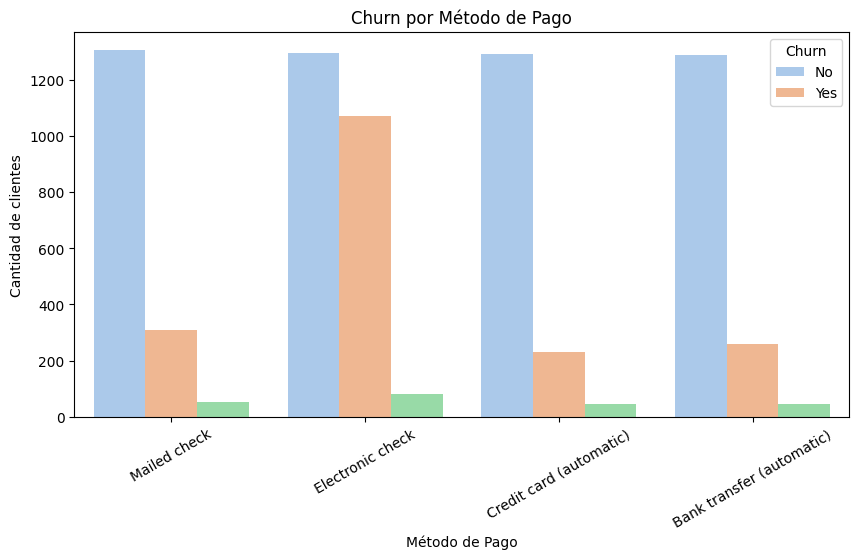

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_final, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.show()


Churn vs. Servicio de Internet (InternetService)

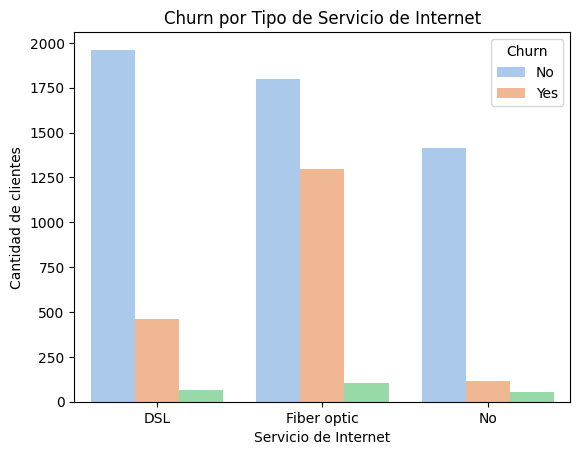

In [29]:
sns.countplot(data=df_final, x='InternetService', hue='Churn', palette='pastel')
plt.title('Churn por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Cantidad de clientes')
plt.show()


Churn vs. Adulto Mayor (SeniorCitizen)

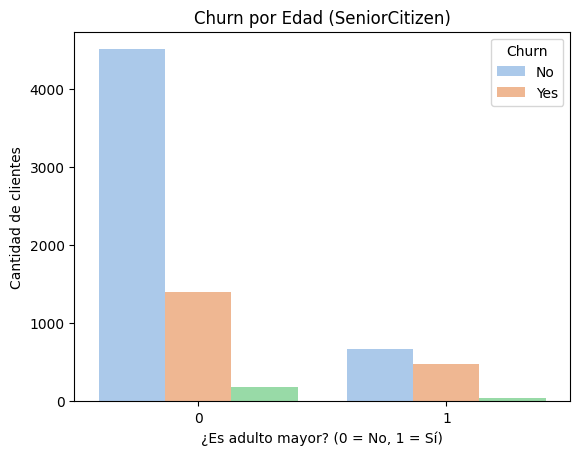

In [30]:
sns.countplot(data=df_final, x='SeniorCitizen', hue='Churn', palette='pastel')
plt.title('Churn por Edad (SeniorCitizen)')
plt.xlabel('¿Es adulto mayor? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()


Conteo de evasión por variables numéricas

<ipython-input-31-4193025477>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='Charges.Total', palette='pastel')


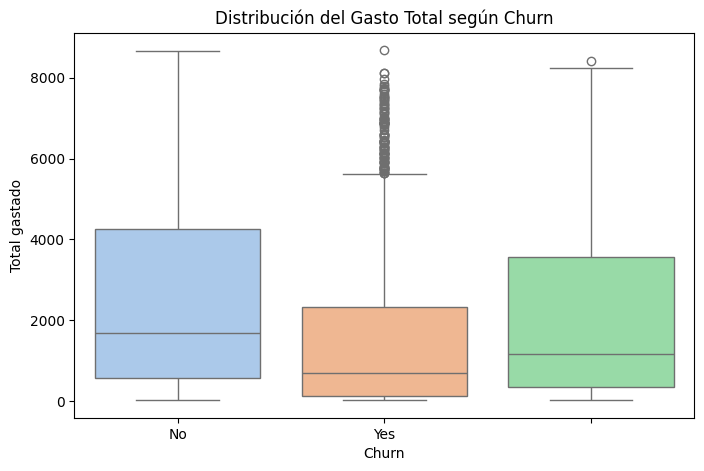

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Churn', y='Charges.Total', palette='pastel')
plt.title('Distribución del Gasto Total según Churn')
plt.ylabel('Total gastado')
plt.xlabel('Churn')
plt.show()


✅ 2. Distribución de Charges.Monthly por Churn
python

<ipython-input-32-2510458016>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='Charges.Monthly', palette='pastel')


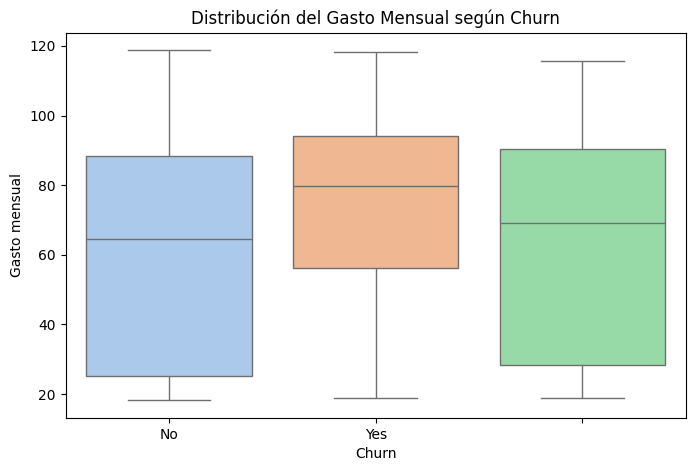

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Churn', y='Charges.Monthly', palette='pastel')
plt.title('Distribución del Gasto Mensual según Churn')
plt.ylabel('Gasto mensual')
plt.xlabel('Churn')
plt.show()


3. Distribución de tenure por Churn

<ipython-input-33-1346477703>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='tenure', palette='pastel')


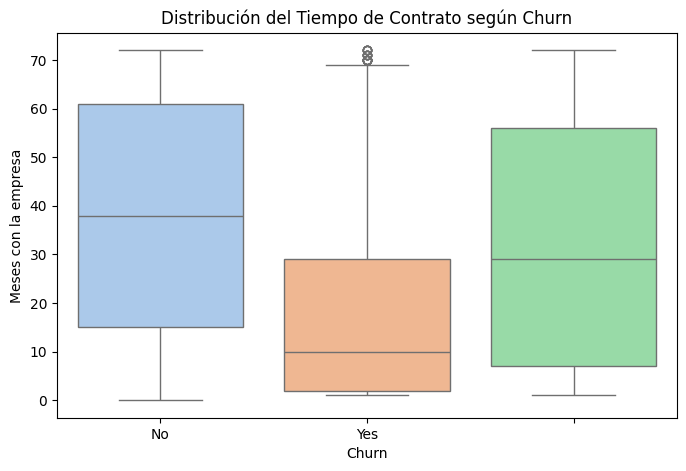

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Churn', y='tenure', palette='pastel')
plt.title('Distribución del Tiempo de Contrato según Churn')
plt.ylabel('Meses con la empresa')
plt.xlabel('Churn')
plt.show()


4. Distribución de Cuentas_Diarias por Churn

<ipython-input-34-381995000>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='Cuentas_Diarias', palette='pastel')


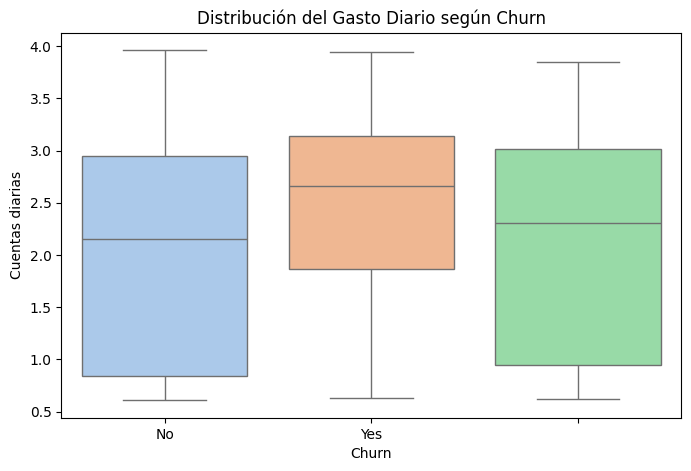

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Churn', y='Cuentas_Diarias', palette='pastel')
plt.title('Distribución del Gasto Diario según Churn')
plt.ylabel('Cuentas diarias')
plt.xlabel('Churn')
plt.show()


#📄Informe final

Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, se realizaron los siguientes pasos:

Importación de los datos desde un archivo .json estructurado.

Normalización de columnas anidadas (customer, phone, internet, account) usando pd.json_normalize.

Conversión de tipos de datos, especialmente Charges.Total, que inicialmente estaba en formato texto (object).

Eliminación de duplicados y tratamiento de valores faltantes (usando eliminación o imputación con la media).

Creación de la columna Cuentas_Diarias, que representa el gasto diario estimado basado en el valor mensual.

Estas acciones permitieron construir un DataFrame limpio y plano, listo para el análisis.

Análisis Exploratorio de Datos
Se realizaron análisis univariados y bivariados, acompañados de visualizaciones:

📌 Distribución de Evasión
Se encontró que aproximadamente 26-27% de los clientes han cancelado el servicio (Churn = Yes).

📌 Variables Categóricas
Tipo de contrato: Los contratos mensuales muestran significativamente mayor tasa de evasión.

Método de pago: El uso de "Electronic Check" está asociado con mayor churn.

Adultos mayores: Tienen ligeramente más probabilidad de cancelar, aunque no es concluyente.

Género: No muestra diferencias significativas en evasión.

📌 Variables Numéricas
Tenure: Los clientes que abandonan tienen menor tiempo con la empresa.

Charges.Total: Clientes que se van han gastado menos en total (relacionado con su menor permanencia).

Cuentas_Diarias y Charges.Monthly: No muestran diferencias drásticas, pero los clientes con gastos más altos tienden a permanecer más.

Conclusiones e Insights
La duración de la relación (tenure) es un fuerte indicador de lealtad: cuanto más tiempo permanece un cliente, menos probable es que cancele.

Los clientes con contratos mensuales y métodos de pago menos formales (como “Electronic Check”) tienen mayor propensión a la evasión.

El gasto total bajo está relacionado con evasión, posiblemente por corta duración del servicio.

El gasto mensual no es decisivo por sí solo, pero combinado con el tipo de contrato puede ser un buen predictor.

